# Tweets sobre finanças

In [3]:
import tweepy as tw
import pandas as pd
import time
import numpy as np

### Obtendo tweets

In [2]:
api_key = "N1FvVcQ2HpggbWgtfN6Zhm60c"
api_key_sec = "B41wy607pGA3PLb5JckconuBw2DB1PqEDxVZIDdCsAK8gHcd2f"
access_token = "1314217786919526400-laaXu0L3b8LUEXA9MD4IZq1TLtVcrC"
access_token_sec = "SPAHQJ2P1zi1NeYAUOGi1ObpFS22fRsjQuj4ASu8bU7Fd"

In [3]:
auth = tw.OAuthHandler(api_key, api_key_sec)
auth.set_access_token(access_token, access_token_sec)

api = tw.API(auth, wait_on_rate_limit=True) 

Função para coletar tweets:

In [4]:
def coletar_tweets(conta):
    
    """
    Coleta aproximadamente os 3200 últimos tweets de uma conta.
    
    Parâmetros
    ----------
    conta: str
    Uma string com o nome da conta

    Retorna
    -------
    Um data frame com o texto e data dos tweets.
    """
    
    results=[]
    timeline = tw.Cursor(api.user_timeline, screen_name=conta, tweet_mode="extended").items()
        
    for status in timeline:
            data = (
            status.user.id,
            status.user.screen_name,
            status.user.name,
            status.full_text,
            status.created_at,
            status.lang)
            results.append(data)

        
    cols = "user_id screen_name name text date lang".split()
    df = pd.DataFrame(results, columns=cols)
    
    return df

In [5]:
infomoney = coletar_tweets("@infomoney")

In [6]:
exame = coletar_tweets("@exame")

In [7]:
braziljournal = coletar_tweets("@BrazilJournal")

In [8]:
tiagoreis = coletar_tweets("@Tiagogreis")

In [10]:
bussola = coletar_tweets("@bussoladoinves")

In [11]:
terracoecon = coletar_tweets("@terracoecon")

In [12]:
traderbolsa = coletar_tweets("@TraderBolsa")

In [13]:
valor = coletar_tweets("@valoreconomico")

In [14]:
data_join = pd.concat([infomoney, valor, exame, braziljournal, tiagoreis, bussola, terracoecon, traderbolsa])

In [15]:
data_join.index = data_join["date"]
data_join.index = pd.to_datetime(data_join.index)
data_join.index.name = "date"
data_join.drop(["date"], inplace = True, axis = 1)

In [16]:
data_join.sort_index(ascending=False, inplace = True)

In [20]:
data_join.shape

(25958, 5)

In [18]:
tweets = data_join.tz_convert('Brazil/East')

In [19]:
tweets.to_csv("data/tweets_junho.csv")

### Juntando dois conjuntos de dados 

In [4]:
tweets_maio = pd.read_csv("data/tweets.csv", parse_dates=True)         # Aproximadamente de fevereiro a maio

In [5]:
tweets_junho = pd.read_csv("data/tweets_junho.csv", parse_dates=True)  # De maio a junho

In [6]:
tweets_maio.index = tweets_maio["date"]
tweets_maio.index = pd.to_datetime(tweets_maio.index)
tweets_maio.index.name = "date"
tweets_maio.drop(["date"], inplace = True, axis = 1)

In [7]:
tweets_junho.index = tweets_junho["date"]
tweets_junho.index = pd.to_datetime(tweets_junho.index)
tweets_junho.index.name = "date"
tweets_junho.drop(["date"], inplace = True, axis = 1)

In [9]:
novos = tweets_junho.loc[tweets_junho.index > pd.to_datetime("2022-05-05 14:00:00-03:00")]

In [10]:
novos.shape

(7900, 5)

In [11]:
tweets_completo = pd.concat([tweets_maio, novos])

In [12]:
tweets_completo.shape

(33855, 5)

In [13]:
25955+7900

33855

In [14]:
tweets_completo.sort_index(ascending=False, inplace = True)

In [15]:
tweets_2022 = tweets_junho.loc[tweets_junho.index > pd.to_datetime("2022-02-01 00:00:00-03:00")]

In [16]:
tweets_2022.shape

(15278, 5)

In [18]:
tweets_2022["datahora"] = tweets_2022.index

<ipython-input-18-22f337a8ac1d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2022["datahora"] = tweets_2022.index


In [19]:
tweets_2022["data"] = tweets_2022.datahora.dt.date
tweets_2022["hora"] = tweets_2022.datahora.dt.hour

<ipython-input-19-6c1c73f94757>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2022["data"] = tweets_2022.datahora.dt.date
<ipython-input-19-6c1c73f94757>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2022["hora"] = tweets_2022.datahora.dt.hour


In [20]:
tweets_2022.tail()

,user_id,screen_name,name,text,lang,datahora,data,hora
date,,,,,,,,
2022-02-01 09:49:59-03:00,2424278232,BrazilJournal,Brazil Journal,EDITORIAL: Justiça para Moïse https://t.co/L7A...,fr,2022-02-01 09:49:59-03:00,2022-02-01,9
2022-02-01 09:25:01-03:00,70575051,bussoladoinves,Bússola do Investidor,Olá investidores! \nConfiram as empresas que d...,pt,2022-02-01 09:25:01-03:00,2022-02-01,9
2022-02-01 08:57:31-03:00,70575051,bussoladoinves,Bússola do Investidor,BTG Pactual compra a Elite Corretora - Finance...,it,2022-02-01 08:57:31-03:00,2022-02-01,8
2022-02-01 08:44:44-03:00,70575051,bussoladoinves,Bússola do Investidor,Americanas e Vibra fazem parceria e criam a Ve...,pt,2022-02-01 08:44:44-03:00,2022-02-01,8
2022-02-01 08:20:01-03:00,70575051,bussoladoinves,Bússola do Investidor,Mentiras que te contaram sobre #investimentos ...,pt,2022-02-01 08:20:01-03:00,2022-02-01,8


Horas entre 16:00 do dia X até 09:59 do outro dia serão consideradas como 16:00 do dia X e atuarão como preditores do preço das 10:00 (abertura do dia seguinte)

In [21]:
tweets_2022["hora_ajustada"] =  np.where(((tweets_2022["hora"]>=16)|(tweets_2022["hora"]<10)), 16, tweets_2022["hora"])

<ipython-input-21-731b19b47ebc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_2022["hora_ajustada"] =  np.where(((tweets_2022["hora"]>=16)|(tweets_2022["hora"]<10)), 16, tweets_2022["hora"])


In [25]:
tweets_2022.tail()

,user_id,screen_name,name,text,lang,datahora,data,hora,hora_ajustada
date,,,,,,,,,
2022-02-01 09:49:59-03:00,2424278232,BrazilJournal,Brazil Journal,EDITORIAL: Justiça para Moïse https://t.co/L7A...,fr,2022-02-01 09:49:59-03:00,2022-02-01,9,16
2022-02-01 09:25:01-03:00,70575051,bussoladoinves,Bússola do Investidor,Olá investidores! \nConfiram as empresas que d...,pt,2022-02-01 09:25:01-03:00,2022-02-01,9,16
2022-02-01 08:57:31-03:00,70575051,bussoladoinves,Bússola do Investidor,BTG Pactual compra a Elite Corretora - Finance...,it,2022-02-01 08:57:31-03:00,2022-02-01,8,16
2022-02-01 08:44:44-03:00,70575051,bussoladoinves,Bússola do Investidor,Americanas e Vibra fazem parceria e criam a Ve...,pt,2022-02-01 08:44:44-03:00,2022-02-01,8,16
2022-02-01 08:20:01-03:00,70575051,bussoladoinves,Bússola do Investidor,Mentiras que te contaram sobre #investimentos ...,pt,2022-02-01 08:20:01-03:00,2022-02-01,8,16


Agrupamento dos tweets por data e hora. Todos os tweets de determinada hora e dia são agregados:

In [128]:
tweets_agregados = tweets_2022.groupby(['data', 'hora_ajustada'], as_index=False).agg({'text': ' '.join})

In [129]:
pd.set_option('display.max_colwidth', 100)

In [130]:
tweets_agregados.tail()

,data,hora_ajustada,text
838,2022-06-07,15,Senadoras americanas lançam projeto de lei para criptomoedas https://t.co/HEnQuBIRXN Live do Val...
839,2022-06-07,16,Negritudes 22: Evento valoriza as narrativas pretas\nhttps://t.co/kJMsgm7njr Pacheco fala em “cl...
840,2022-06-08,10,"CSN Mineração (CMIN3) emitirá R$ 1,4 bi em debêntures; SLC (SLCE3) eleva previsão de produção, t..."
841,2022-06-08,11,Três companhias divulgaram informações sobre proventos. Confira: - Finance News \nhttps://t.co/w...
842,2022-06-08,16,É agora! Economia circular para além da reciclagem: https://t.co/WeMWxpbrtw Teorias da conspiraç...


Visualizando os tweets do dia 07 de junho de 2022 às 16h:

In [131]:
tweets_agregados.iloc[839,2]

'Negritudes 22: Evento valoriza as narrativas pretas\nhttps://t.co/kJMsgm7njr Pacheco fala em “clamor” sobre combustíveis, mas promete ouvir governadores https://t.co/CY78XO8QeB Câmara avança em negociações para votar projeto sobre mercado de criptoativos https://t.co/4leDDxZBP8 Próxima safra do Brasil está salva com chegada de fertilizantes russos, diz ministro da Agricultura https://t.co/xn5rkPk01P Ativos de emergentes tiveram saída de US$ 4,9 bilhões em maio, revela IIF https://t.co/sRKxJ6KXfs Economia do metaverso pode chegar a US$ 13 trilhões, diz Citi https://t.co/262nE2VS3e Fintech processa exchange Gemini por roubo de US$ 37 milhões em criptomoedas https://t.co/kPd5uJlqgD Notícias corporativas da noite desta terça, 7 - Finance News\nhttps://t.co/uamAiYWwFZ\n#ações “Óleo de soja está 13 reais o litro”, diz Bolsonaro após propor redução de lucro sobre a cesta básica https://t.co/sLMb12up6C Aluguel residencial sobe 0,59% em maio, afirma FGV https://t.co/osMdjP17OS RT @ExameIn: Com

### Pré-processamento do texto

In [132]:
import nltk
import string
import re
from nltk.corpus import stopwords

In [133]:
nltk.download("stopwords")
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\bruno\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\bruno\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [134]:
portugues_stops = stopwords.words('portuguese')

In [135]:
pontuacao = string.punctuation+'“'+'”'

In [136]:
pontuacao

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~“”'

In [137]:
def pre_processamento(texto):
    
    """
    Pré-processa o texto para eliminar palavras que trazem pouca ou nenhuma informação para a tarefa de predição.
    1. Torna as palavras lowercase;
    2. Remove stopwords;
    3. Remove dígitos;
    4. Reomove links, urls;
    5. Remove pontuação;
    6. Remove letras isoladas.
    
    Parâmetros
    ----------
    testo: str
    Uma string com o conteúdo a ser pré-processado.

    Retorna
    -------
    Uma string com o texto pré-processado.
    """
        
    pre = nltk.word_tokenize(texto, language='portuguese')
    pre = [palavra.lower() for palavra in pre]
    pre = [palavra for palavra in pre if palavra not in portugues_stops]
    pre = [re.sub(r"\d+",'',palavra) for palavra in pre]
    pre = [re.sub("https", '', palavra) for palavra in pre]
    pre = [re.sub(r"^\/.*", '', palavra) for palavra in pre]                #remove expressões que comecem com "/"
    pre = [palavra for palavra in pre if palavra not in pontuacao]
    pre = [palavra for palavra in pre if len(palavra)>1]
    pre = " ".join(pre)
    
    return pre

In [138]:
len(tweets_agregados.iloc[839,2])

22436

In [139]:
len(pre_processamento(tweets_agregados.iloc[839,2]))

14389

In [140]:
pre_processamento(tweets_agregados.iloc[839,2])

"negritudes evento valoriza narrativas pretas pacheco fala clamor sobre combustíveis promete ouvir governadores câmara avança negociações votar projeto sobre mercado criptoativos próxima safra brasil salva chegada fertilizantes russos diz ministro agricultura ativos emergentes saída us bilhões maio revela iif economia metaverso pode chegar us trilhões diz citi fintech processa exchange gemini roubo us milhões criptomoedas notícias corporativas noite desta terça finance news ações óleo soja reais litro diz bolsonaro após propor redução lucro sobre cesta básica aluguel residencial sobe maio afirma fgv rt examein companhia perdeu valor mercado desde início ano expectativa ceo consiga promover mudanças levar e… stf derruba decisão devolveu mandato deputado francischini tre nega domicílio eleitoral sérgio moro paulo decisão afeta possível candidatura csn mineração vai emitir bi debêntures finance news cmin petróleo alta pode anular efeito tributário reduzir combustíveis dizem especialistas 

A função lambda abaico aplica a função *pre-processamento()* a cada célula do dataframe *tweets_agregados*:

In [141]:
tweets_agregados['texto_processado'] = tweets_agregados.apply(lambda row: pre_processamento(row['text']), axis=1)

In [142]:
tweets_agregados.head()

,data,hora_ajustada,text,texto_processado
0,2022-02-01,10,Dica de #leitura direto da nossa #biblioteca pra você:\n\n📚 A psicologia financeira\nO #livro tr...,dica leitura direto biblioteca pra psicologia financeira livro traz casos sucesso fracassos most...
1,2022-02-01,12,"BLOCK TRADE. Starboard vende metade da posição em 3R, pondo fim ao overhang https://t.co/Pf4m7U...",block trade starboard vende metade posição pondo fim overhang rrrp
2,2022-02-01,13,"Atualização das 13h30: Vale, 3R, Banco Pan, Randon e outros destaques - Finance News \nhttps://t...",atualização vale banco pan randon outros destaques finance news rrrp rapt bpan petr ibovespa
3,2022-02-01,14,⚠️ #IbovespaFuturo registra queda. Entenda por que. 📉\n\nVeja essa e outras #notícias que vão ...,⚠️ ibovespafuturo registra queda entenda veja outras notícias vão movimentar mercadofinanceiro i...
4,2022-02-01,16,"Lucro ajustado da Romi cresce e soma R$ 54,7 milhões no 4T21 - Finance News \nhttps://t.co/C0Mmw...",lucro ajustado romi cresce soma milhões finance news romi romi queda techs fator lula projeções ...


### Análise de Sentimento

In [143]:
from leia import SentimentIntensityAnalyzer 

s = SentimentIntensityAnalyzer()

In [144]:
s.polarity_scores(tweets_agregados.iloc[3,3])

{'neg': 0.098, 'neu': 0.757, 'pos': 0.145, 'compound': 0.2732}

In [145]:
s.polarity_scores(tweets_agregados.iloc[3,3])["compound"]

0.2732

A função lambda abaixo aplica a medição de polaridade do sentimento a cada conjunto de tweets pré-processado:

In [146]:
tweets_agregados['sentimento'] = tweets_agregados.apply(lambda row: s.polarity_scores(row['texto_processado'])["compound"], axis=1)

In [147]:
tweets_agregados.head(10)

,data,hora_ajustada,text,texto_processado,sentimento
0,2022-02-01,10,Dica de #leitura direto da nossa #biblioteca pra você:\n\n📚 A psicologia financeira\nO #livro tr...,dica leitura direto biblioteca pra psicologia financeira livro traz casos sucesso fracassos most...,0.7964
1,2022-02-01,12,"BLOCK TRADE. Starboard vende metade da posição em 3R, pondo fim ao overhang https://t.co/Pf4m7U...",block trade starboard vende metade posição pondo fim overhang rrrp,0.0000
2,2022-02-01,13,"Atualização das 13h30: Vale, 3R, Banco Pan, Randon e outros destaques - Finance News \nhttps://t...",atualização vale banco pan randon outros destaques finance news rrrp rapt bpan petr ibovespa,-0.4767
3,2022-02-01,14,⚠️ #IbovespaFuturo registra queda. Entenda por que. 📉\n\nVeja essa e outras #notícias que vão ...,⚠️ ibovespafuturo registra queda entenda veja outras notícias vão movimentar mercadofinanceiro i...,0.2732
4,2022-02-01,16,"Lucro ajustado da Romi cresce e soma R$ 54,7 milhões no 4T21 - Finance News \nhttps://t.co/C0Mmw...",lucro ajustado romi cresce soma milhões finance news romi romi queda techs fator lula projeções ...,0.9231
5,2022-02-02,10,"Rápidas: BTG, Meal, petroleiras, BRF, Santander, Cielo - Finance News \nhttps://t.co/Vs6GpzIWCW\...",rápidas btg meal petroleiras brf santander cielo finance news bpac brfs sanb,0.0000
6,2022-02-02,11,Ações do Santander têm queda firme após balanço abaixo do esperado pelo mercado | Finanças | Val...,ações santander têm queda firme após balanço abaixo esperado mercado finanças valor econômico,0.4019
7,2022-02-02,12,"Vendas de veículos caem e têm pior janeiro em 17 anos, diz Fenabrave - Economia https://t.co/5za...",vendas veículos caem têm pior janeiro anos diz fenabrave economia,-0.6249
8,2022-02-02,13,"Atualização das 13h30: IRB, Assaí, BRF e outros destaques - Finance News \nhttps://t.co/fY2q7nE1...",atualização irb assaí brf outros destaques finance news irbr ibovespa asai lov that chicken maio...,0.8555
9,2022-02-02,14,"Ministério da Economia estuda cortes no IPI de 15% a 30%, diz fonte da pasta | Brasil | Valor Ec...",ministério economia estuda cortes ipi diz fonte pasta brasil valor econômico,0.4019


### Ajustando o índice para data e hora

In [148]:
tweets_agregados["data"] = tweets_agregados["data"].astype(str)
tweets_agregados["hora_ajustada"] = tweets_agregados["hora_ajustada"].astype(str)

In [149]:
tweets_agregados["data"].dtype

dtype('O')

In [150]:
tweets_agregados["hora_ajustada"].dtype

dtype('O')

In [155]:
lista_horas = tweets_agregados["hora_ajustada"].tolist()
lista_datas = tweets_agregados["data"].tolist()

In [172]:
lista_indice = [pd.to_datetime(lista_datas[d]+ " " + lista_horas[d] + ":00:00-03:00") for d in range(len(lista_datas))]

In [173]:
tweets_agregados.index = lista_indice

In [178]:
tweets_agregados.tail(30)

,data,hora_ajustada,text,texto_processado,sentimento
2022-06-04 11:00:00-03:00,2022-06-04,11,Engenheiro é o segundo brasileiro a viajar ao espaço https://t.co/WQvvfoBR5T Saudades do ‘arraiá...,engenheiro segundo brasileiro viajar espaço saudades arraiá volta festas joão anima mercado even...,0.7430
2022-06-04 12:00:00-03:00,2022-06-04,12,Guedes promete unificar data de pagamento de tributos das empresas https://t.co/8trsgNbpva Estre...,guedes promete unificar data pagamento tributos empresas estrelas pop homenageiam rainha elisabe...,0.5859
2022-06-04 13:00:00-03:00,2022-06-04,13,"PUBG, a rara diversão no sombrio universo do Afeganistão https://t.co/XK4CwKwVCu “Medo não impor...",pubg rara diversão sombrio universo afeganistão medo importava diz victor hespanha segundo brasi...,-0.4588
2022-06-04 14:00:00-03:00,2022-06-04,14,Mercado de aço perde força desde abril e siderúrgicas seguram reajustes de preços | Empresas | V...,mercado aço perde força desde abril siderúrgicas seguram reajustes preços empresas valor econômi...,0.7506
2022-06-04 15:00:00-03:00,2022-06-04,15,Seria possível um novo governo reestatizar a Eletrobras (ELET3;ELET6)? https://t.co/REdjzXCVlC V...,possível novo governo reestatizar eletrobras elet elet vivemos onda covid entenda motivos alta c...,0.3182
2022-06-04 16:00:00-03:00,2022-06-04,16,@MarioWorms1983 https://t.co/MU0l7pmXk0 Gasolina mais cara faz pessoas trocarem carro por ônibus...,marioworms gasolina cara faz pessoas trocarem carro ônibus mostra estudo honra rodrigofm excelen...,0.9712
2022-06-05 10:00:00-03:00,2022-06-05,10,"IPCA, preço de oferta da Eletrobras e assembleia sobre fusão entre Aliansce e brMalls: o que aco...",ipca preço oferta eletrobras assembleia sobre fusão aliansce brmalls acompanhar semana ipca elet...,-0.7579
2022-06-05 11:00:00-03:00,2022-06-05,11,"Pix Parcelado: como comparar vantagens, juros e modalidades? Veja se a ferramenta serve para voc...",pix parcelado comparar vantagens juros modalidades veja ferramenta serve dia meio ambiente token...,0.3612
2022-06-05 12:00:00-03:00,2022-06-05,12,Tarcísio afirma que irá revogar impostos em São Paulo\nhttps://t.co/Lfz9Z69A1s Vinhos de Portuga...,tarcísio afirma irá revogar impostos paulo vinhos portugal chega último dia novas provas bate-pa...,-0.2960
2022-06-05 13:00:00-03:00,2022-06-05,13,Pequim retira restrições contra a covid após surto epidêmico https://t.co/LxtJp09cpX ARTIGO: O q...,pequim retira restrições contra covid após surto epidêmico artigo significa desistência doria ti...,0.0000


In [175]:
tweets_agregados.index.dtype

datetime64[ns, pytz.FixedOffset(-180)]

In [176]:
sentimento = tweets_agregados["sentimento"]

<AxesSubplot:>

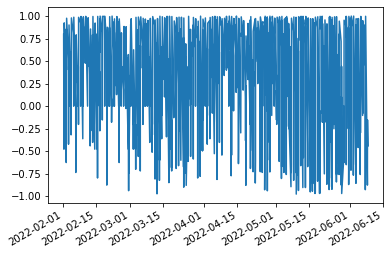

In [177]:
sentimento.plot()

In [179]:
tweets_agregados.to_csv("data/sentimento.csv", date_format = '%Y-%m-%d %H:%M:%S')